<a href="https://colab.research.google.com/github/livjab/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

In [5]:
lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head(10)   

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [6]:
df.heights.mean()

69.6

In [7]:
import random 
random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0,1))

print(population)   
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [12]:
sample = random.sample(population, 5)
print(sample)
print(len(sample))

[1, 0, 0, 1, 0]
5


In [13]:
df = pd.DataFrame({"likes_coke": sample})
df.head()

df.likes_coke.mean()

0.4

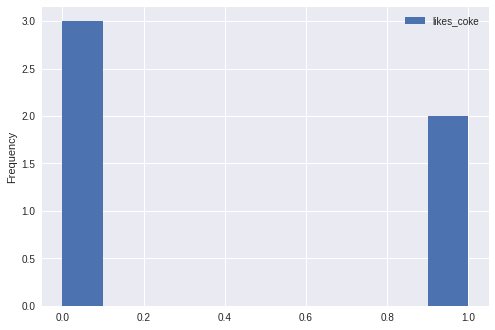

In [14]:
df.plot.hist()

In [15]:
df.likes_coke.describe()

count    5.000000
mean     0.400000
std      0.547723
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
Name: likes_coke, dtype: float64

In [16]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average

print("Population Mean:", mean(population))
print("Sample Mean:", mean(sample))

Population Mean: 0.507
Sample Mean: 0.4


In [17]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)
  
variance(df.likes_coke)

0.30000000000000004

In [18]:
def stddev(list):
  var = variance(list)
  return var**(1/2) 

stddev(df.likes_coke)

0.5477225575051662

In [19]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - .5)/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

-0.4082482904638629


In [21]:
stats.ttest_1samp(df['likes_coke'], .5)

Ttest_1sampResult(statistic=-0.4082482904638629, pvalue=0.7040000000000002)

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# TODO - your code here!

In [0]:
import pandas as pd

In [25]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['house-votes-84.data']), header=None, na_values=["?"])

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df.columns = ["Class Name", "handicapped-infants", "water-project-cost-sharing",
              "adoption-of-the-budget-resolution", "physician-fee-freeze", 
              "el-salvador-aid", "religious-groups-in-schools", 
              "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile",
              "immigration", "synfuels-corporation-cutback", "education-spending",
              "superfund-right-to-sue", "crime", "duty-free-exports", 
              "export-administration-act-south-africa"]

In [56]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [57]:
df.shape

(435, 17)

In [58]:
df.isnull().sum()

Class Name                                  0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
# Going to just drop/ffill Na for now.
# Spent too much time trying to fill na with how that class specifically voted

In [0]:
df.dropna(how="all", inplace=True)
df.fillna(method="ffill", inplace=True)

In [0]:
# get those zeros and ones in there

df.replace({"n":0, "y":1}, inplace=True)

In [0]:
# explore the data to find some issues which seem polarizing or bipartisan

In [104]:
df["handicapped-infants"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  handicapped-infants
democrat    1                      0.597744
            0                      0.402256
republican  0                      0.808383
            1                      0.191617
Name: handicapped-infants, dtype: float64

In [105]:
df["water-project-cost-sharing"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  water-project-cost-sharing
democrat    0                             0.507519
            1                             0.492481
republican  0                             0.520958
            1                             0.479042
Name: water-project-cost-sharing, dtype: float64

In [106]:
df["adoption-of-the-budget-resolution"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  adoption-of-the-budget-resolution
democrat    1                                    0.872180
            0                                    0.127820
republican  0                                    0.868263
            1                                    0.131737
Name: adoption-of-the-budget-resolution, dtype: float64

In [107]:
df["physician-fee-freeze"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  physician-fee-freeze
democrat    0                       0.928571
            1                       0.071429
republican  1                       0.988024
            0                       0.011976
Name: physician-fee-freeze, dtype: float64

In [108]:
df["el-salvador-aid"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  el-salvador-aid
democrat    0                  0.774436
            1                  0.225564
republican  1                  0.952096
            0                  0.047904
Name: el-salvador-aid, dtype: float64

In [109]:
df["religious-groups-in-schools"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  religious-groups-in-schools
democrat    0                              0.522556
            1                              0.477444
republican  1                              0.898204
            0                              0.101796
Name: religious-groups-in-schools, dtype: float64

In [110]:
df["anti-satellite-test-ban"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  anti-satellite-test-ban
democrat    1                          0.766917
            0                          0.233083
republican  0                          0.748503
            1                          0.251497
Name: anti-satellite-test-ban, dtype: float64

In [111]:
df["aid-to-nicaraguan-contras"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  aid-to-nicaraguan-contras
democrat    1                            0.827068
            0                            0.172932
republican  0                            0.832335
            1                            0.167665
Name: aid-to-nicaraguan-contras, dtype: float64

In [112]:
df["mx-missile"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  mx-missile
democrat    1             0.733083
            0             0.266917
republican  0             0.886228
            1             0.113772
Name: mx-missile, dtype: float64

In [102]:
df["immigration"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  immigration
democrat    0              0.526316
            1              0.473684
republican  1              0.550898
            0              0.449102
Name: immigration, dtype: float64

In [113]:
df["synfuels-corporation-cutback"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  synfuels-corporation-cutback
democrat    0.0                             0.503759
            1.0                             0.496241
republican  0.0                             0.861446
            1.0                             0.138554
Name: synfuels-corporation-cutback, dtype: float64

In [114]:
df["education-spending"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  education-spending
democrat    0                     0.853383
            1                     0.146617
republican  1                     0.832335
            0                     0.167665
Name: education-spending, dtype: float64

In [115]:
df["superfund-right-to-sue"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  superfund-right-to-sue
democrat    0                         0.703008
            1                         0.296992
republican  1                         0.850299
            0                         0.149701
Name: superfund-right-to-sue, dtype: float64

In [117]:
df["crime"].groupby(df["Class Name"]).value_counts(normalize=True)

Class Name  crime
democrat    0        0.650376
            1        0.349624
republican  1        0.958084
            0        0.041916
Name: crime, dtype: float64

In [0]:
# Democrats seem to support "anti-satellite-test-ban" more than republicans
# Let's test it

In [119]:
stats.ttest_1samp(df["anti-satellite-test-ban"], .5)

Ttest_1sampResult(statistic=2.8587457539575256, pvalue=0.004459038287152373)

In [0]:
# I think I'm supposed to do one for dem and one for rep

# Going to try to separate data set by each class

In [129]:
dummies = pd.get_dummies(df["Class Name"])

df["Republican"] = dummies["republican"]
df["Democrat"] = dummies["democrat"]

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Republican,Democrat
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1,1,0
1,republican,0,1,0,1,1,1,0,0,0,0,0.0,1,1,1,0,1,1,0
2,democrat,0,1,1,1,1,1,0,0,0,0,1.0,0,1,1,0,0,0,1
3,democrat,0,1,1,0,1,1,0,0,0,0,1.0,0,1,0,0,1,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1.0,0,1,1,1,1,0,1


In [132]:
rep_df = df[df["Republican"] ==1]
dem_df = df[df["Democrat"] ==1]
rep_df.head()
dem_df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Republican,Democrat
2,democrat,0,1,1,1,1,1,0,0,0,0,1.0,0,1,1,0,0,0,1
3,democrat,0,1,1,0,1,1,0,0,0,0,1.0,0,1,0,0,1,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1.0,0,1,1,1,1,0,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0.0,0,1,1,1,1,0,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0.0,0,1,1,1,1,0,1


In [133]:
# Dems

stats.ttest_1samp(dem_df["anti-satellite-test-ban"], .5)

Ttest_1sampResult(statistic=10.277094671613689, pvalue=4.526074867610737e-21)

In [134]:
# Reps

stats.ttest_1samp(rep_df["anti-satellite-test-ban"], .5)

Ttest_1sampResult(statistic=-7.379424419418141, pvalue=7.254080754516763e-12)

In [0]:
# both p values are pretty small. I think that supports my hypothesis?

In [0]:
# Issue that republicans support more than dems: physician-fee-freeze

In [138]:
# Dems

stats.ttest_1samp(dem_df["physician-fee-freeze"], .5)

Ttest_1sampResult(statistic=-27.089594936915432, pvalue=2.528030811669765e-78)

In [136]:
# Reps

stats.ttest_1samp(rep_df["physician-fee-freeze"], .5)

Ttest_1sampResult(statistic=57.803572816072815, pvalue=6.891830236613077e-112)

In [0]:
# p values tiny? May have made a mistake somewhere

In [0]:
# fairly bipartisan issue: water-project-cost-sharing

In [139]:
# Dems

stats.ttest_1samp(dem_df["water-project-cost-sharing"], .5)

Ttest_1sampResult(statistic=-0.2448219769461387, pvalue=0.8067837439265892)

In [140]:
# Reps

stats.ttest_1samp(rep_df["water-project-cost-sharing"], .5)

Ttest_1sampResult(statistic=-0.5405270948156855, pvalue=0.5895580876353443)

In [141]:
# higher p values, this seems to make sense

# also want to test this with original df

stats.ttest_1samp(df["physician-fee-freeze"], .5)

Ttest_1sampResult(statistic=-3.155852155711057, pvalue=0.0017122540458670765)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars